[Color Wheel](https://www.sessions.edu/color-calculator/)

<span style="color:yellow"> The term <span style="color:magenta"><strong>cases</strong></span> will be used to indicate all types of cases i.e. <strong>Confirmed, Death and Recovered</strong>.<br>In case of a specific type of case, the type will be mentioned explicitly.</span>
### DATA TO BE REPRESENTED:-
1. Number of cases on a given day:-
    1. Globally.
    2. In a particular Country / Region.
    3. Filetering based on a given count i.e. > 1000 cases etc.
    4. Sorting in a partcular order.
2. Number of cases in span of some days:-
    1. Globally.
    2. In a particular Country / Region.
    3. Filetering based on a given count i.e. > 1 Lac cases etc.
    4. Sorting in a partcular order.
3. Displaying cases on a map:-
    1. Entire world map.
    2. A particular country / region.
    3. Displaying regions with some threshold number of cases i.e. > 1 Lac cases etc.
    4. Types of cases differentiated based on colors.
    5. Types of cases differentiated based on range of cases i.e. 0 - 10000, 10000 - 1 lac etc.
4. Think of different types of graphs that can be used:-
    1. Line graphs
    2. Scatter plots.
    3. Pie charts.
    4. World maps.
5. A race among the countries based on the number of active covid cases. (Horizontal bar charts)
6. Current  / Live data of countries / regions.
7. Give short summarized forms of covid articles.
8. Provide relevant covid research papers.

## IMPORTING DEPENDENCIES

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
import geopandas as gpd
import folium as fl
%matplotlib inline
from IPython.display import display, HTML

CSS = """
.output {
    flex-direction: row;
}
"""

HTML('<style>{}</style>'.format(CSS))

In [2]:
mp.style.use('fivethirtyeight')
pd.set_option('float_format', '{:f}'.format)
pd.set_option('display.max_rows', 50)

## COVID DATA URLS

#### IMPORTING DATA

In [3]:
def create_data(urls):
    types = ['Confirmed', 'Death', 'Recovered']
    data = []
    for url, type_of_case in zip(urls, types):
        raw_data = pd.read_csv(url)
        melted_data = pd.melt(raw_data,
                              id_vars = ['Province/State', 'Country/Region', 'Lat', 'Long'],
                              var_name = 'Date',
                              value_name = type_of_case)
        data.append(melted_data)
    final_data = data[0].join(data[1]['Death']).join(data[2]['Recovered'])
    return final_data

In [4]:
confirmed_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
deaths_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
recovered_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

In [5]:
covid_data = create_data([confirmed_url, deaths_url, recovered_url])
covid_data['Date'] = pd.to_datetime(covid_data['Date'])
covid_data_by_date = covid_data.groupby('Date').sum()

In [6]:
covid_data.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Death,Recovered
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0.000000
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0.000000
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0.000000
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0.000000
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0.000000


In [7]:
covid_data.describe()[['Confirmed', 'Death', 'Recovered']]

,Confirmed,Death,Recovered
count,47082.000000,47082.000000,44781.000000
mean,14018.537806,775.483773,6670.737701
std,106215.051418,5767.094878,43740.637817
min,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000
50%,137.000000,2.000000,35.000000
75%,1263.750000,22.000000,645.000000
max,3576157.000000,138358.000000,1397531.000000


In [8]:
print('Type of Cases\t Number of Cases\tDate')
max_conf_ind = covid_data['Confirmed'].idxmax()
conf_date = covid_data.loc[max_conf_ind, 'Date']
print('Confirmed\t', covid_data['Confirmed'].max(), f'\t\t{conf_date.year}-{conf_date.month}-{conf_date.day}')

max_death_ind = covid_data['Death'].idxmax()
death_date = covid_data.loc[max_death_ind, 'Date']
print('Death\t\t', covid_data['Death'].max(), f'\t\t{death_date.year}-{death_date.month}-{death_date.day}')

max_recov_ind = covid_data['Recovered'].idxmax()
recov_date = covid_data.loc[max_recov_ind, 'Date']
print('Recovered\t', covid_data['Recovered'].max(), f'\t\t{recov_date.year}-{recov_date.month}-{recov_date.day}')

Type of Cases	 Number of Cases	Date
Confirmed	 3576157 		2020-7-16
Death		 138358 		2020-7-16
Recovered	 1397531.0 		2020-7-7


In [123]:
print('Type of Cases\t Number of Cases\tDate')
max_conf_ind = ebola['Confirmed'].idxmax()
conf_date = ebola.loc[max_conf_ind, 'Date']
print('Confirmed\t', ebola['Confirmed'].max(), f'\t\t{conf_date.year}-{conf_date.month}-{conf_date.day}')

max_death_ind = ebola['Death'].idxmax()
death_date = ebola.loc[max_death_ind, 'Date']
print('Death\t\t', ebola['Death'].max(), f'\t\t{death_date.year}-{death_date.month}-{death_date.day}')

# max_recov_ind = covid_data['Recovered'].idxmax()
# recov_date = covid_data.loc[max_recov_ind, 'Date']
# print('Recovered\t', covid_data['Recovered'].max(), f'\t\t{recov_date.year}-{recov_date.month}-{recov_date.day}')

Type of Cases	 Number of Cases	Date


AttributeError: 'str' object has no attribute 'year'

In [14]:
covid_data['Confirmed'].max()

3498902

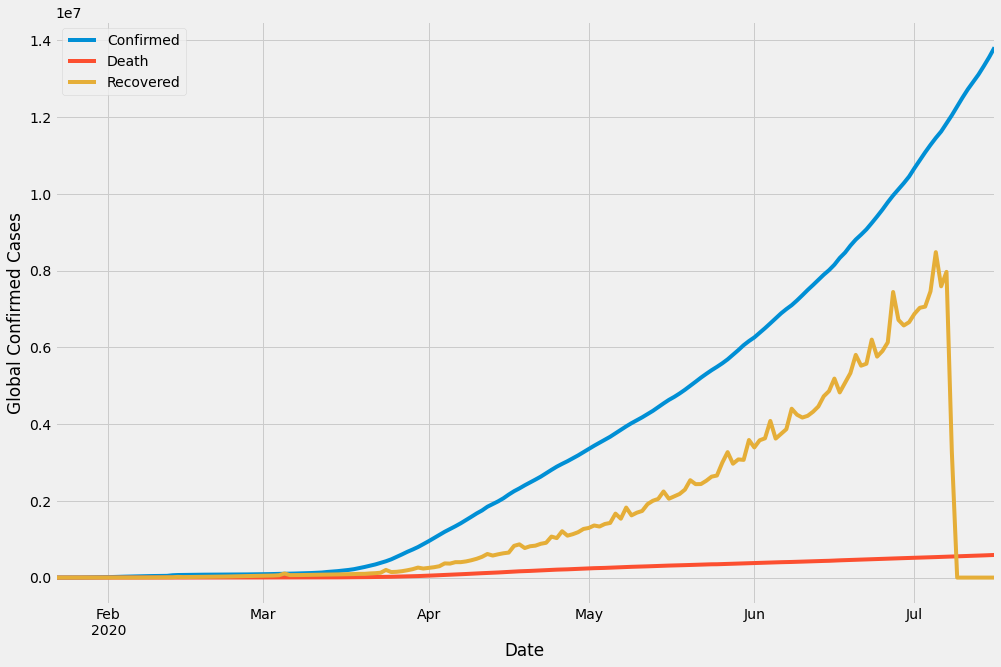

In [9]:
mp.figure(figsize = (15, 10))
mp.ylabel('Global Confirmed Cases')
mp.xlabel('Date')
covid_data_by_date['Confirmed'].plot()
covid_data_by_date['Death'].plot()
covid_data_by_date['Recovered'].plot()
mp.legend()

In [48]:
covid_data_by_date.head(6)

,Lat,Long,Confirmed,Death,Recovered
Date,,,,,
2020-01-22,5606.382050,6072.631214,555,17,28.000000
2020-01-23,5606.382050,6072.631214,654,18,30.000000
2020-01-24,5606.382050,6072.631214,941,26,36.000000
2020-01-25,5606.382050,6072.631214,1434,42,43.000000
2020-01-26,5606.382050,6072.631214,2118,56,102.000000
2020-01-27,5606.382050,6072.631214,2927,82,108.000000


### CASES ON A GIVEN DATE GLOBALLY

In [10]:
given_date = '7/2/20'
covid_data_by_date.loc[given_date, 'Confirmed']

10875852.0

In [95]:
given_date = '7/2/20'
int(covid_data_by_date.loc[given_date, 'Confirmed'])

10871926

### CASES ON A GIVEN DATE COUNTRY WISE
<span style="color:yellow">Originally the plan was to display all the data but the huge number of country/regions made it hard to present the data perfectly. <br>Thus the representation was changed to displaying only top and bottom 10 country/regions</span>

In [31]:
def num_cases_on_a_given_date_country_wise(data, given_date, type_of_case, ascending=False, num_countries = 10):
    data_grouped_by_date_and_country = data.groupby(['Date', 'Country/Region']).sum()
    data_on_a_date_country_wise = data_grouped_by_date_and_country.loc[given_date, :]
    data_on_a_date_country_wise = \
        data_on_a_date_country_wise.sort_values(by = type_of_case,
                                                ascending = ascending)[:min(num_countries, len(data_on_a_date_country_wise))]
    countries = data_on_a_date_country_wise.reset_index()['Country/Region']
    case_counts = data_on_a_date_country_wise[type_of_case]
    colour = '#03dffc' if type_of_case == 'Confirmed' else ('#fc8803' if type_of_case == 'Recovered' else '#fc0b03')
    mp.rc('font', size=10)
    mp.figure(figsize = (15, 8))
    mp.bar(countries, case_counts, color = colour)
    mp.ylabel(f'{type_of_case} Cases', fontsize = 15)
    mp.xlabel('Countries', fontsize = 15)
    mp.title(f'Number of {type_of_case} Cases on {given_date}', fontsize = 15)
    mp.tight_layout()
#     print(max(case_counts))
    upper_bound = int(max(case_counts) / 5)
    mp.yticks([i for i in range(0, int(max(case_counts)) + upper_bound, max(int(max(case_counts) / 5), 10))])
    for index, data in enumerate(case_counts):
        mp.text(x = index - 0.35, y = data+0.5, s = f'{data}', fontdict = dict(fontsize = 13))

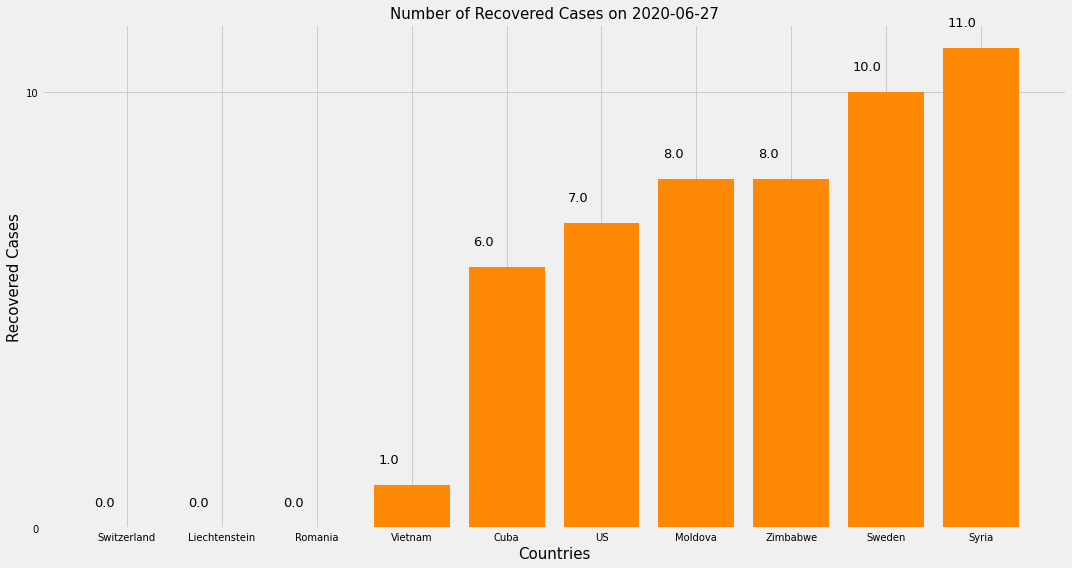

In [34]:
num_cases_on_a_given_date_country_wise(covid_data, '2020-06-27', 'Recovered', ascending = True)

### CASES ON A GIVEN DATE COUNTRYWISE BASED ON A THRESHOLD

In [83]:
def num_cases_on_a_given_date_country_wise_with_threshold(data, given_date, type_of_case, ascending=False, num_countries = 10, threshold = 0):
    data_grouped_by_date_and_country = data.groupby(['Date', 'Country/Region']).sum()
    
    data_on_a_date_country_wise = data_grouped_by_date_and_country.loc[given_date, :]
    filt = data_on_a_date_country_wise[type_of_case] >= threshold
    data_on_a_date_country_wise = data_on_a_date_country_wise[filt]
    data_on_a_date_country_wise = \
        data_on_a_date_country_wise.sort_values(by = type_of_case,
                                                ascending = ascending)[:min(num_countries, len(data_on_a_date_country_wise))]
    countries = data_on_a_date_country_wise.reset_index()['Country/Region']
    case_counts = data_on_a_date_country_wise[type_of_case]
    mp.rc('font', size=10)
    mp.figure(figsize = (15, 8))
    mp.bar(countries, case_counts, color = '#03dffc')
    mp.ylabel(f'{type_of_case} Cases', fontsize = 15)
    mp.xlabel('Countries', fontsize = 15)
    mp.title(f'Number of {type_of_case} Cases on {given_date}', fontsize = 15)
    mp.tight_layout()
    mp.yticks([i for i in range(0, max(case_counts) + 1000, 500000)])
#     mp.xticks([i for i in range(0, max(case_counts)+1000, 10000)])
    for index, data in enumerate(case_counts):
        mp.text(x = index - 0.35, y = data, s = f'{data}', fontdict = dict(fontsize = 13))

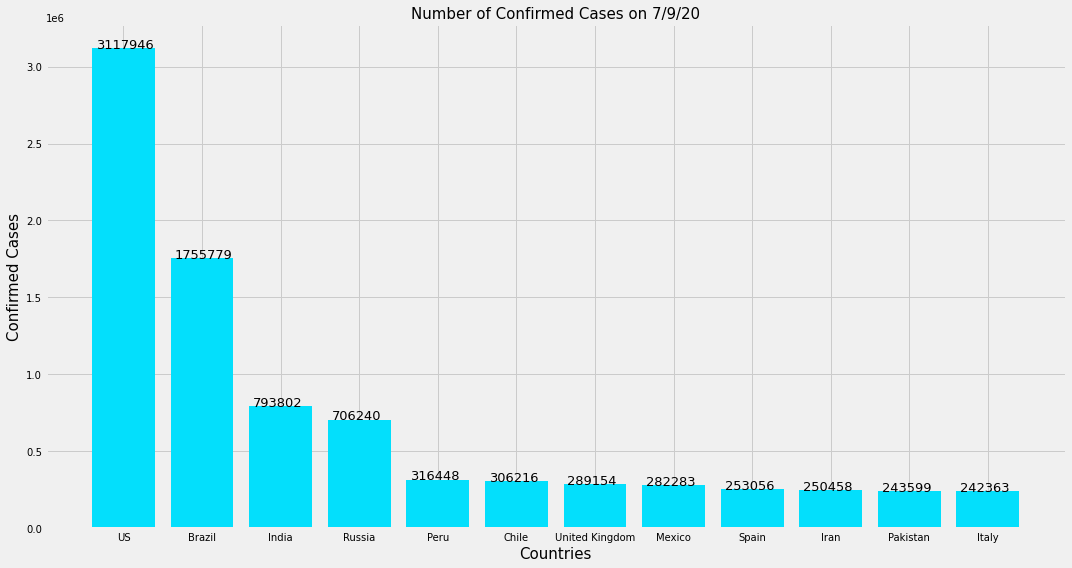

In [84]:
num_cases_on_a_given_date_country_wise_with_threshold(covid_data, '7/9/20', 'Confirmed',num_countries = 12, ascending = False, threshold = 500)

### NUMBER OF CASES IN A SPAN OF DAYS
#### NUMBER OF CASES GLOBALLY

In [35]:
def cases_in_a_span_of_days(covid_data, date, time_delta):
    from datetime import timedelta, datetime
    str_to_date = datetime.strptime(date, '%m/%d/%y')
    str_to_new_date = str_to_date + timedelta(time_delta)
    new_date = (str_to_new_date).strftime('%#m/%#d/%Y')
    data = covid_data.loc[date:new_date]
    mp.rc('font', size=10)
    mp.figure(figsize = (15, 8))
    mp.plot(data['Confirmed'], marker = '.', markersize = 15)
    mp.plot(data['Death'], marker = '.', markersize = 15)
    mp.plot(data['Recovered'], marker = '.', markersize = 15)
    mp.xlabel('Dates')
    mp.ylabel('Cases')
    mp.xticks(rotation = 90)
    mp.legend(['Confirmed', 'Death', 'Recovered'])
    mp.show()
#     print(date, new_date)
#     print(data)

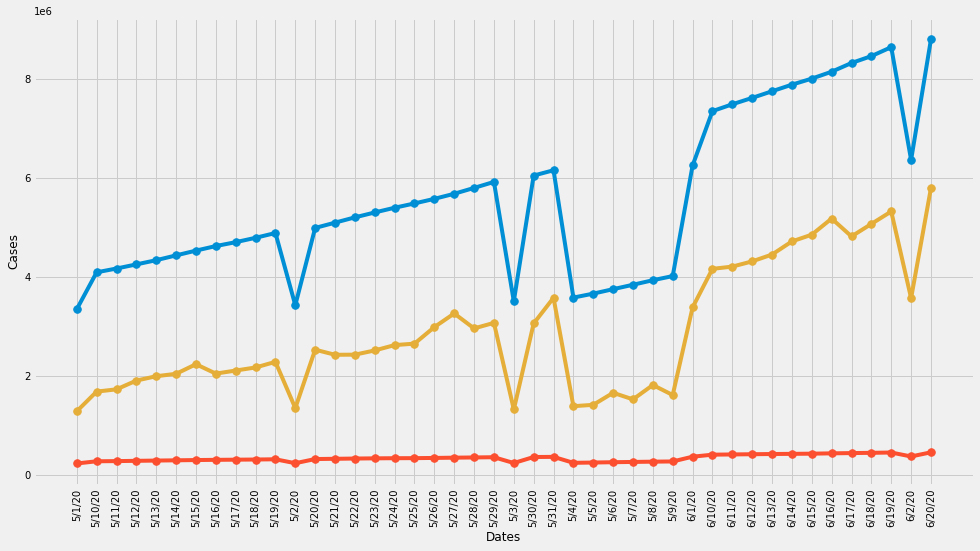

In [57]:
cases_in_a_span_of_days(covid_data_by_date, '5/1/20', 50)

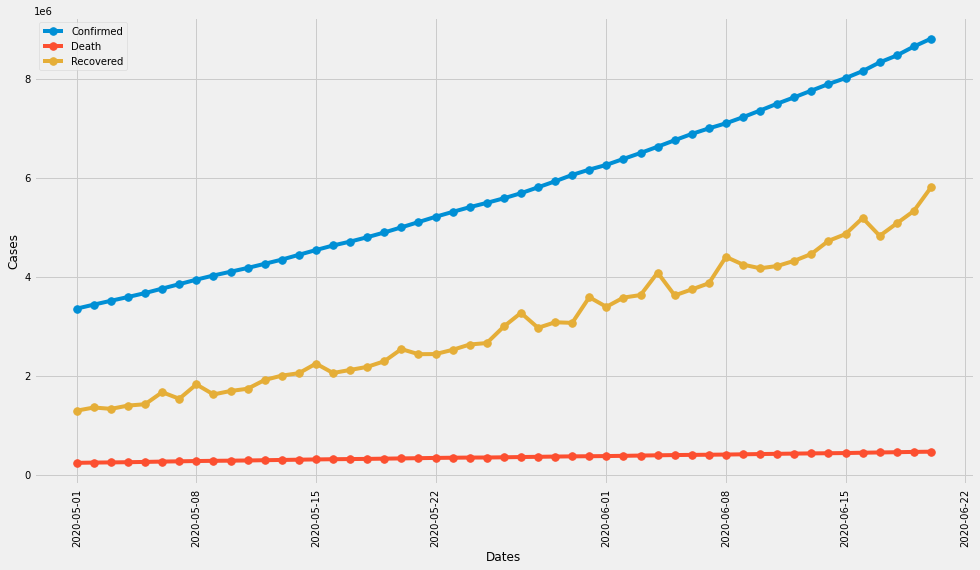

In [36]:
cases_in_a_span_of_days(covid_data_by_date, '5/1/20', 50)

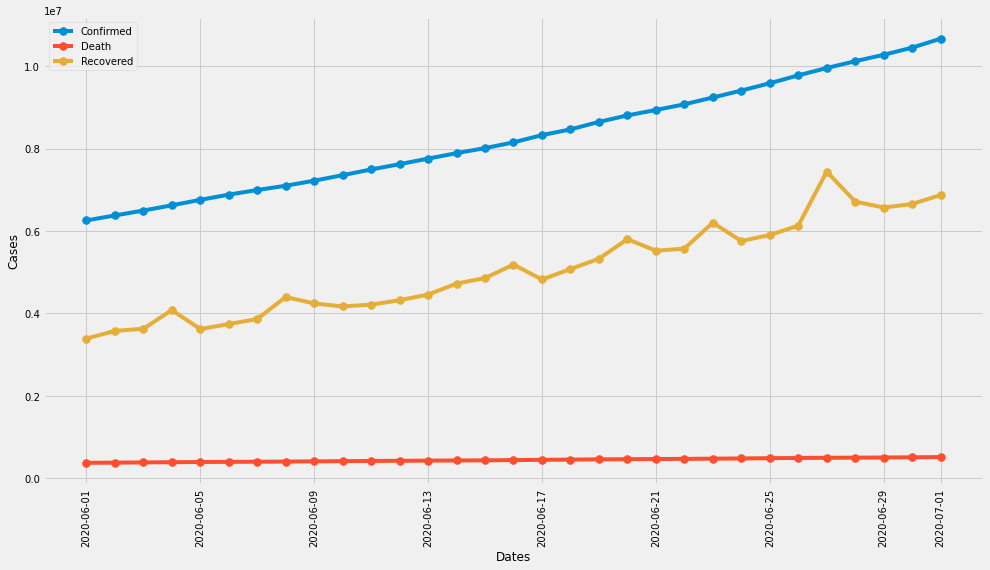

In [54]:
cases_in_a_span_of_days(covid_data_by_date, '6/1/20', 30)

## COMPARATIVE ANALYSIS OF COVID, SARS, EBOLA DISEASES

In [37]:
sars = pd.read_csv(r'dataset\pandemic_sars_dataset.csv')
ebola = pd.read_csv(r'dataset\pandemic_ebola_dataset.csv')
# covid = pd.read_csv(r'dataset\coronavirus_dataset_20200403-142011.csv')

In [56]:
display(ebola.drop(['Lat', 'Long'], axis=1))
display(sars.drop(['Lat', 'Long'], axis=1))
display(covid_data.drop(['Lat', 'Long', 'Province/State'], axis=1))

,Country/Region,Date,Confirmed,Deaths
0,Guinea,2014-08-29,482.000000,287.000000
1,Nigeria,2014-08-29,15.000000,6.000000
2,Sierra Leone,2014-08-29,935.000000,380.000000
3,Liberia,2014-08-29,322.000000,225.000000
4,Sierra Leone,2014-09-05,1146.000000,443.000000
...,...,...,...,...
2480,Liberia,2016-03-23,3151.000000,nan
2481,Italy,2016-03-23,1.000000,nan
2482,Liberia,2016-03-23,2.000000,1.000000
2483,Nigeria,2016-03-23,19.000000,7.000000


,Date,Country/Region,Confirmed,Deaths,Recovered
0,2003-03-17,Germany,1,0,0
1,2003-03-17,Canada,8,2,0
2,2003-03-17,Singapore,20,0,0
3,2003-03-17,Hong Kong,95,1,0
4,2003-03-17,Switzerland,2,0,0
...,...,...,...,...,...
2533,2003-07-11,Switzerland,1,0,1
2534,2003-07-11,Thailand,9,2,7
2535,2003-07-11,United Kingdom,4,0,4
2536,2003-07-11,US,75,0,67


,Country/Region,Date,Confirmed,Death,Recovered
0,Afghanistan,2020-01-22,0,0,0.000000
1,Albania,2020-01-22,0,0,0.000000
2,Algeria,2020-01-22,0,0,0.000000
3,Andorra,2020-01-22,0,0,0.000000
4,Angola,2020-01-22,0,0,0.000000
...,...,...,...,...,...
47077,Sao Tome and Principe,2020-07-16,740,14,nan
47078,Yemen,2020-07-16,1552,438,nan
47079,Comoros,2020-07-16,328,7,nan
47080,Tajikistan,2020-07-16,6741,56,nan


In [79]:
display(ebola.describe()[['Confirmed', 'Deaths']])
display(sars.describe()[['Confirmed', 'Deaths', 'Recovered']])
display(covid_data.describe()[['Confirmed', 'Death', 'Recovered']])

,Confirmed,Deaths
count,2484.000000,1648.000000
mean,1436.616345,781.662015
std,2574.200797,1258.113098
min,1.000000,0.000000
25%,1.000000,0.000000
50%,7.000000,2.000000
75%,3118.000000,1760.750000
max,8704.000000,3858.000000


,Confirmed,Deaths,Recovered
count,2538.000000,2538.000000,2538.000000
mean,219.211978,17.812845,134.678487
std,825.024564,61.425627,581.595350
min,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000
50%,3.000000,0.000000,2.000000
75%,14.750000,2.000000,9.000000
max,5329.000000,348.000000,4941.000000


,Confirmed,Death,Recovered
count,47082.000000,47082.000000,44781.000000
mean,14018.537806,775.483773,6670.737701
std,106215.051418,5767.094878,43740.637817
min,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000
50%,137.000000,2.000000,35.000000
75%,1263.750000,22.000000,645.000000
max,3576157.000000,138358.000000,1397531.000000


In [74]:
display(ebola.drop(['Lat', 'Long'], axis=1).groupby(['Date']).sum())
display(sars.drop(['Lat', 'Long'], axis=1).groupby(['Date']).sum())
display(covid_data.drop(['Lat', 'Long', 'Province/State'], axis=1).groupby(['Date']).sum())

,Confirmed,Deaths
Date,,
2014-08-29,1754.000000,898.000000
2014-09-05,2383.000000,1243.000000
2014-09-08,2552.000000,1376.000000
2014-09-12,2639.000000,1386.000000
2014-09-16,3017.000000,1513.000000
...,...,...
2015-12-17,15249.000000,5683.000000
2015-12-22,15249.000000,5683.000000
2015-12-23,15249.000000,5683.000000


,Confirmed,Deaths,Recovered
Date,,,
2003-03-17,167,4,0
2003-03-18,219,4,0
2003-03-19,264,9,0
2003-03-20,306,10,0
2003-03-21,350,10,0
...,...,...,...
2003-07-07,8434,812,7426
2003-07-08,8431,812,7428
2003-07-09,8431,812,7438


,Confirmed,Death,Recovered
Date,,,
2020-01-22,555,17,28.000000
2020-01-23,654,18,30.000000
2020-01-24,941,26,36.000000
2020-01-25,1434,42,43.000000
2020-01-26,2118,56,102.000000
...,...,...,...
2020-07-12,12915440,569009,0.000000
2020-07-13,13108223,572824,0.000000
2020-07-14,13329678,578484,0.000000


In [91]:

display(ebola.drop(['Lat', 'Long', 'Country/Region'], axis=1).groupby(['Date']).max())
display(sars.drop(['Lat', 'Long', 'Country/Region'], axis=1).groupby(['Date']).max())
display(covid_data.drop(['Lat', 'Long', 'Province/State', 'Country/Region'], axis=1).groupby(['Date']).max())

,Confirmed,Deaths
Date,,
2014-08-29,935.000000,380.000000
2014-09-05,1146.000000,443.000000
2014-09-08,1234.000000,508.000000
2014-09-12,1287.000000,498.000000
2014-09-16,1464.000000,563.000000
...,...,...
2015-12-17,8704.000000,3589.000000
2015-12-22,8704.000000,3589.000000
2015-12-23,8704.000000,3589.000000


,Confirmed,Deaths,Recovered
Date,,,
2003-03-17,95,2,0
2003-03-18,123,2,0
2003-03-19,150,5,0
2003-03-20,173,6,0
2003-03-21,203,6,0
...,...,...,...
2003-07-07,5327,348,4934
2003-07-08,5327,348,4934
2003-07-09,5327,348,4939


,Confirmed,Death,Recovered
Date,,,
2020-01-22,444,17,28.000000
2020-01-23,444,17,28.000000
2020-01-24,549,24,31.000000
2020-01-25,761,40,32.000000
2020-01-26,1058,52,45.000000
...,...,...,...
2020-07-12,3304942,135205,nan
2020-07-13,3364157,135566,nan
2020-07-14,3431574,136466,nan


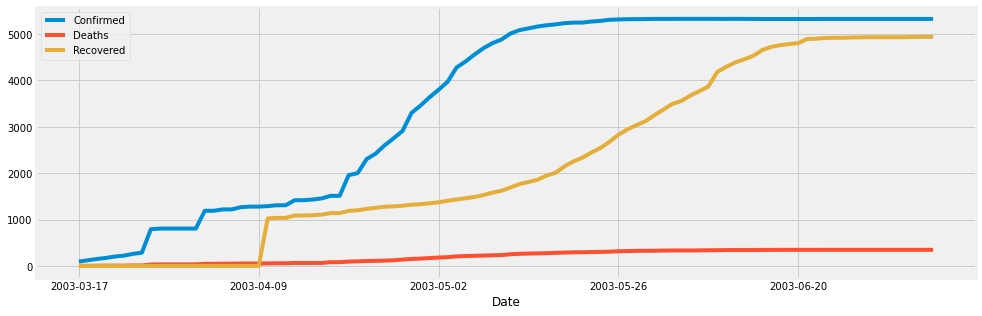

In [80]:
# Number of Cases Per day
sars_per_day = sars.groupby('Date')[['Confirmed', 'Deaths', 'Recovered']].max()
sars_per_day.plot(kind = 'line', figsize = (15, 5)) 

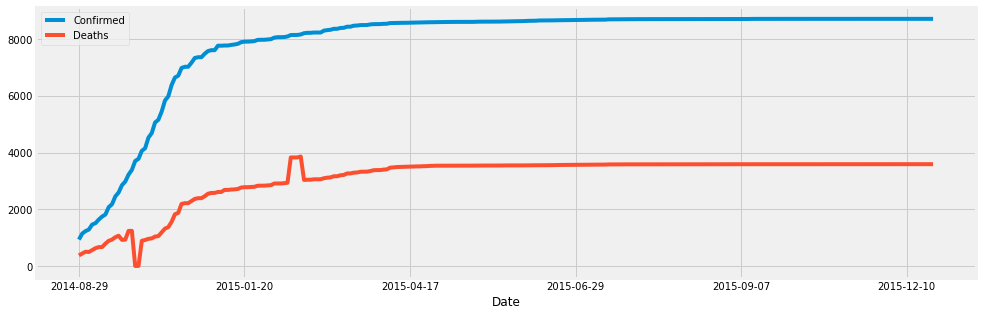

In [95]:
ebola_per_day = ebola.groupby('Date')[['Confirmed', 'Deaths']].max()
ebola_per_day.plot(kind = 'line', figsize = (15, 5))

In [90]:
ebola_country_wise = ebola.groupby(['Country/Region', 'Date']).max()
sars_country_wise = sars.groupby(['Country/Region', 'Date']).max()
covid_country_wise = covid_data.groupby(['Country/Region', 'Date']).max()
display(ebola_country_wise[['Confirmed', 'Deaths']])
display(sars_country_wise[['Confirmed', 'Deaths', 'Recovered']])
display(covid_country_wise[['Confirmed', 'Death', 'Recovered']])

Confirmed     Deaths
Country/Region Date                            
Guinea         2014-08-29 482.000000 287.000000
               2014-09-05 604.000000 362.000000
               2014-09-08 664.000000 400.000000
               2014-09-12 678.000000 403.000000
               2014-09-16 743.000000 429.000000
...                              ...        ...
United Kingdom 2015-12-17   1.000000        nan
               2015-12-22   1.000000        nan
               2015-12-23   1.000000        nan
               2015-12-29   1.000000        nan
               2016-03-23   1.000000        nan

[2379 rows x 2 columns]

Confirmed  Deaths  Recovered
Country/Region Date                                    
Australia      2003-04-01          1       0          0
               2003-04-02          1       0          0
               2003-04-03          1       0          0
               2003-04-04          1       0          0
               2003-04-05          1       0          0
...                              ...     ...        ...
Vietnam        2003-07-07         63       5         58
               2003-07-08         63       5         58
               2003-07-09         63       5         58
               2003-07-10         63       5         58
               2003-07-11         63       5         58

[2479 rows x 3 columns]

Confirmed  Death  Recovered
Country/Region Date                                   
Afghanistan    2020-01-22          0      0   0.000000
               2020-01-23          0      0   0.000000
               2020-01-24          0      0   0.000000
               2020-01-25          0      0   0.000000
               2020-01-26          0      0   0.000000
...                              ...    ...        ...
Zimbabwe       2020-07-12        985     18        nan
               2020-07-13       1034     19        nan
               2020-07-14       1064     20        nan
               2020-07-15       1089     20        nan
               2020-07-16       1362     23        nan

[33276 rows x 3 columns]

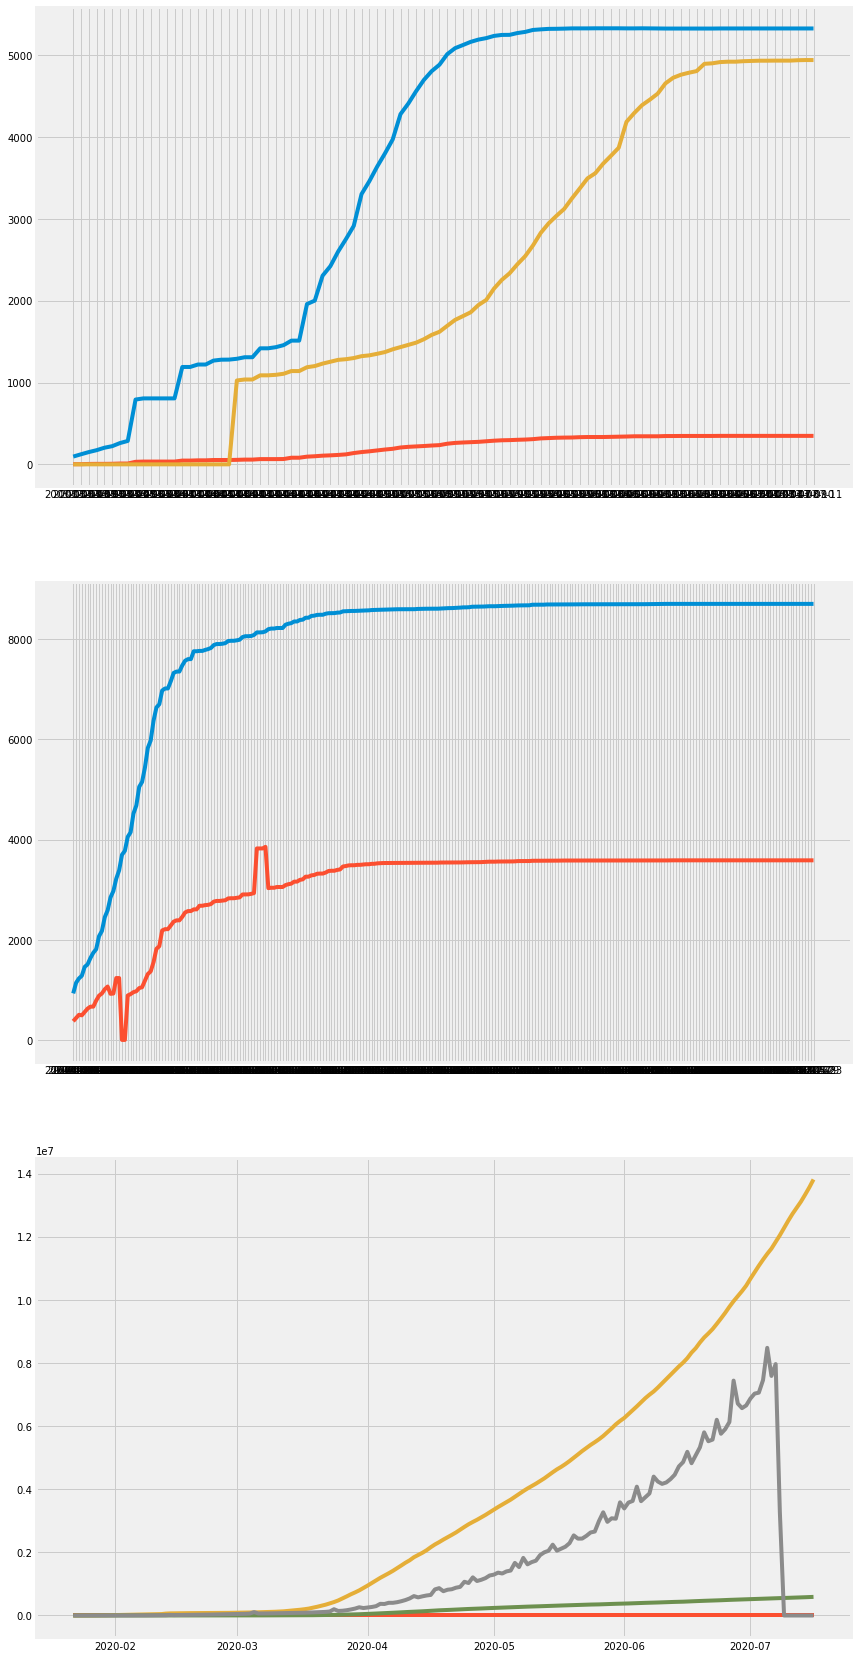

In [103]:
fig,axes = mp.subplots(nrows=3,ncols=1,figsize=(13,30))
_ = axes[0].plot(sars_per_day)
_ = axes[1].plot(ebola_per_day)
_ = axes[2].plot(covid_data_by_date)

In [104]:
def get_n_days(start_date, n):
    day_n = datetime.datetime.strptime(start_date,"%Y-%m-%d") + datetime.timedelta(days=n)
    return day_n

In [122]:
ebola_per_day['2014-08-29':'2014-09-05']

,Confirmed,Deaths
Date,,
2014-08-29,935.000000,380.000000
2014-09-05,1146.000000,443.000000


### MAP

In [ ]:
def country_maps(country, )

In [143]:
gpd1 = gpd.GeoDataFrame(covid_data, geometry = gpd.points_from_xy(covid_data['Long'], covid_data['Lat']))

In [145]:
type(gpd1)

geopandas.geodataframe.GeoDataFrame

In [138]:
from shapely.geometry import Point, Polygon

In [139]:
points = [Point(x, y) for x, y in zip(covid_data.Long, covid_data.Lat)]

In [147]:
gpd2 = gpd.GeoDataFrame(covid_data, geometry = points)

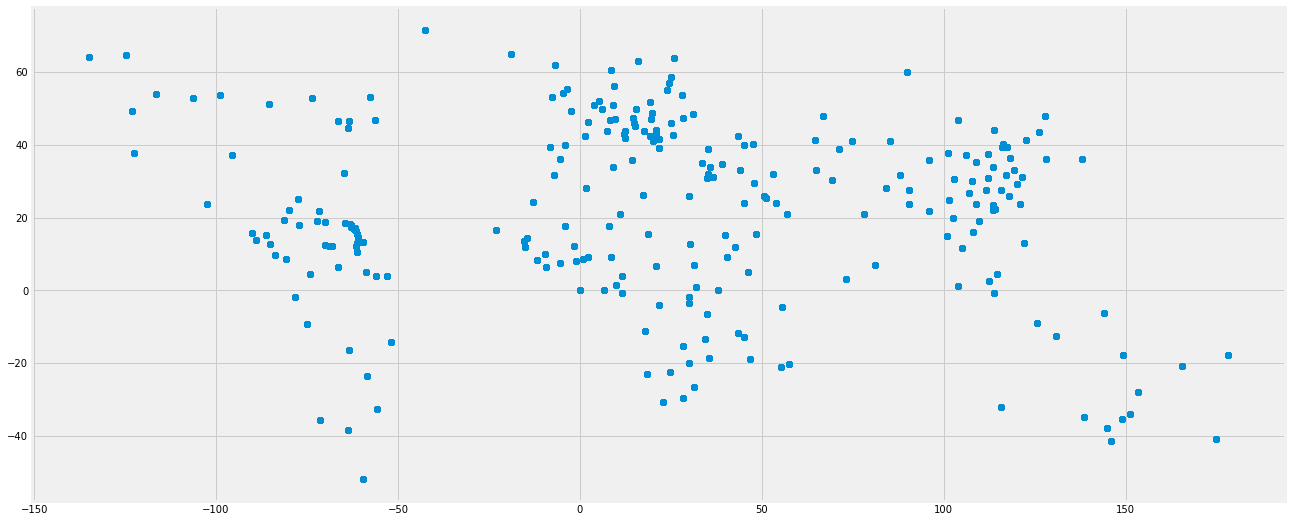

In [148]:
gpd2.plot(figsize = (20, 10))

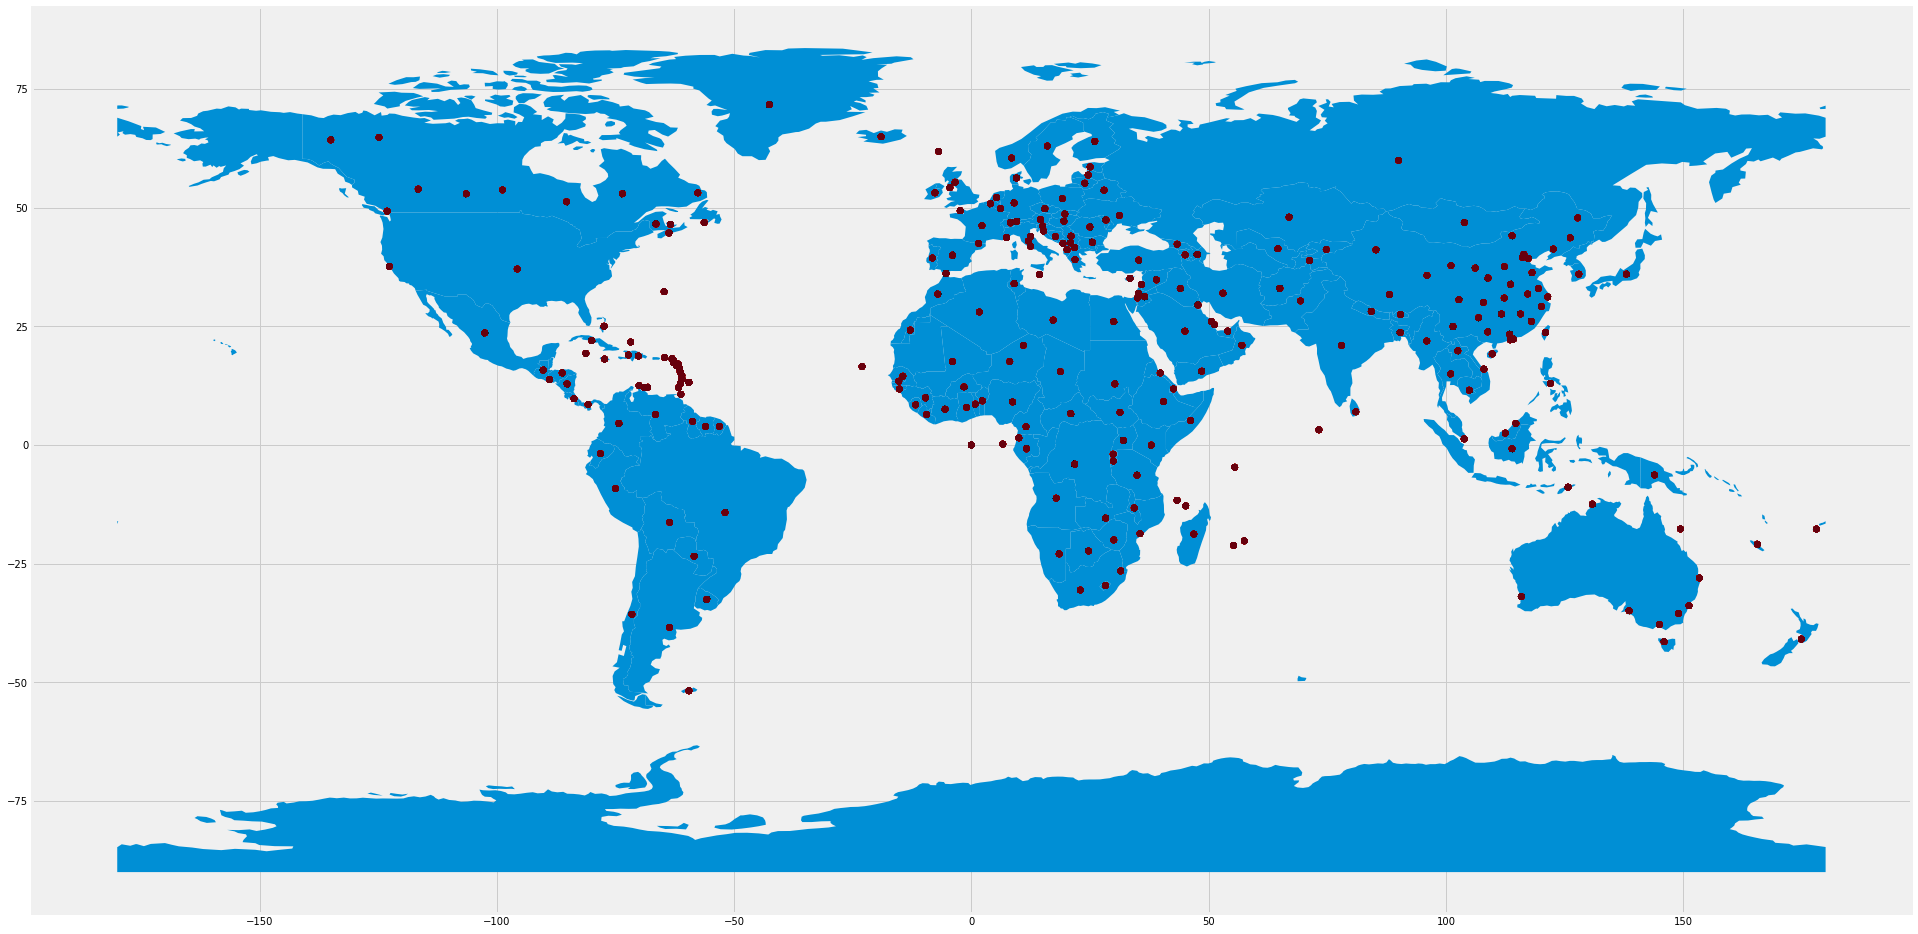

In [154]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(figsize = (30, 20))
gpd2.plot(cmap='Reds', ax= ax)
# ax.axis('off')

In [155]:
india = world[]

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.000000,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.000000,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.500000,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.000000,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.000000,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.000000,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.000000,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.000000,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.000000,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


module